# 資料匯入與處理

In [4]:
import pandas as pd

df_ml = pd.read_csv('tw_house.csv', encoding='big5')
df_ml.sample(5)

ModuleNotFoundError: No module named 'pandas'

In [2]:
from sklearn.model_selection import train_test_split

X = df_ml.drop(['鄉鎮市區','總價元'],axis=1) #去除鄉鎮市區、總價元兩個欄位
y = df_ml[['總價元']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3) # 30% for testing, 70% for training
X_train.head()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_std = sc.transform(X)

: 

# MLP with Keras
可試看看不同 #hidden layer, activation, optimizer, epochs, batch_size

In [4]:
X_train_std.shape

(448, 23)

In [5]:
# Custom Metrics: R Square Score for Keras metrics
import keras.backend as K
def r_squared(y_true, y_pred):
    SS_res = K.sum((y_true - y_pred)**2) 
    SS_tot = K.sum((y_true - K.mean(y_true))**2) 
    return (1 - SS_res/SS_tot)

Using TensorFlow backend.


### optimizer可使用: sgd, adam, rmsprop, adagrad, adadelta 等

或使用from keras import optimizer設定更詳細參數 (如使用SGD with momentum)
https://keras.io/optimizers/

In [6]:
from keras.models import Sequential
from keras.layers import Dense

# 產生Sequential Model
model = Sequential()

# 增加一層: (hidden)layer=50, input layer=23, 初始weights為常態分佈(normal distribution), activation function為ReLU
model.add(Dense(50, input_dim=23, kernel_initializer='normal',activation='relu'))

# 增加一層: (output)layer=1, weights為常態分佈(normal distribution)
model.add(Dense(1, kernel_initializer='normal'))

# 建立模型: Loss function為MSE, optimizer為adam
model.compile(loss='mse', optimizer='adam',metrics=[r_squared])

### 模型摘要

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1200      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


### 用history紀錄訓練過程歷史

In [8]:
history = model.fit(X_std, y.values, epochs=500, batch_size=20, validation_split=0.3)

Train on 448 samples, validate on 192 samples
Epoch 1/500
448/448 [==============================] - 0s - loss: 9479182.5625 - r_squared: -1.7828 - val_loss: 17836340.3333 - val_r_squared: -1.3718
Epoch 2/500
448/448 [==============================] - 0s - loss: 9477873.4263 - r_squared: -1.3524 - val_loss: 17834151.1302 - val_r_squared: -1.3714
Epoch 3/500
448/448 [==============================] - 0s - loss: 9475703.6897 - r_squared: -1.7460 - val_loss: 17830335.2292 - val_r_squared: -1.3707
Epoch 4/500
448/448 [==============================] - 0s - loss: 9471792.9866 - r_squared: -1.6470 - val_loss: 17824548.0208 - val_r_squared: -1.3697
Epoch 5/500
448/448 [==============================] - 0s - loss: 9466283.8036 - r_squared: -1.3676 - val_loss: 17815465.2240 - val_r_squared: -1.3682
Epoch 6/500
448/448 [==============================] - 0s - loss: 9458256.7500 - r_squared: -1.4962 - val_loss: 17803681.2500 - val_r_squared: -1.3662
Epoch 7/500
448/448 [===========================

In [11]:
history.history.items()

dict_items([('val_loss', [17836340.333333332, 17834151.130208332, 17830335.229166668, 17824548.020833332, 17815465.223958332, 17803681.25, 17788652.588541668, 17770092.333333332, 17747819.614583332, 17723304.9375, 17694803.6875, 17661666.994791668, 17628417.78125, 17590302.395833332, 17545441.260416668, 17502255.125, 17457176.354166668, 17405487.28125, 17351351.875, 17295511.104166668, 17236677.385416668, 17179670.270833332, 17111617.46875, 17045832.416666668, 16976713.890625, 16905951.21875, 16827779.911458332, 16750314.604166666, 16674825.75, 16585691.151041666, 16507038.802083334, 16420556.895833334, 16330270.557291666, 16247196.817708334, 16155970.932291666, 16058379.8125, 15961598.614583334, 15861733.036458334, 15761546.40625, 15667146.588541666, 15564786.572916666, 15462911.708333334, 15361397.364583334, 15262487.776041666, 15156381.046875, 15052129.182291666, 14945960.010416666, 14832476.817708334, 14726051.880208334, 14616749.140625, 14508850.244791666, 14386687.145833334, 1427

In [12]:
history.history.get('val_r_squared')

[-1.3718343377113342,
 -1.3714076255758603,
 -1.3707258130113285,
 -1.3696780204772949,
 -1.3681742797295253,
 -1.3662134806315105,
 -1.3637375434239705,
 -1.3607503448923428,
 -1.3571732466419537,
 -1.3532069350282352,
 -1.3487335567673047,
 -1.3435715412100155,
 -1.3382852822542191,
 -1.3321353917320569,
 -1.3251999020576477,
 -1.3183429017663002,
 -1.3111284126838048,
 -1.3030821581681569,
 -1.2946783403555553,
 -1.2859083488583565,
 -1.2767285977800686,
 -1.2675424392024677,
 -1.2570906380812328,
 -1.2466897914807002,
 -1.2359843874971073,
 -1.2249824876586597,
 -1.2127536088228226,
 -1.2009083380301793,
 -1.1891320049762726,
 -1.1753385240832965,
 -1.1629854043324788,
 -1.149625189602375,
 -1.135704259077708,
 -1.1229690983891487,
 -1.1082954282561939,
 -1.0934640218814213,
 -1.0789766609668732,
 -1.0632946044206619,
 -1.0481059824426968,
 -1.0336940065026283,
 -1.018216331799825,
 -1.0027374203006427,
 -0.98715792844692862,
 -0.97207414607206977,
 -0.95605536798636115,
 -0.940211

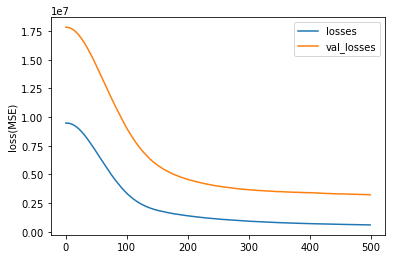

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
losses = history.history.get('loss')
val_losses = history.history.get('val_loss')
x = [i for i in range(len(losses))]
plt.plot(x, losses, label='losses')
plt.plot(x, val_losses, label='val_losses')
plt.ylabel('loss(MSE)')
plt.legend()
plt.show()

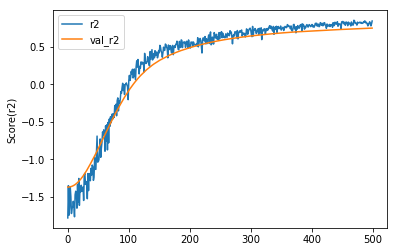

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
r2 = history.history.get('r_squared')
val_r2 = history.history.get('val_r_squared')
x = [i for i in range(len(r2))]
plt.plot(x, r2, label='r2')
plt.plot(x, val_r2, label='val_r2')
plt.ylabel('Score(r2)')
plt.legend()
plt.show()

In [15]:
model.evaluate(X_test_std, y_test.values, batch_size=192)

192/192 [==============================] - 0s


[1924716.0, 0.74920082092285156]

# LinearRegression (作為Baseline比較)

In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np

lr = LinearRegression()
lr.fit(X_train_std, y_train)

print('各變項參數:', lr.coef_)
print("MSE: %.2f" % np.mean((lr.predict(X_test_std) - y_test) ** 2))
print("R Square:",lr.score(X_test_std, y_test))

各變項參數: [[ -2.79720256e+02   2.53365916e+03   8.69151629e+02  -9.05583180e+01
   -7.70368880e+01  -8.35200411e-01  -6.09760072e+02   3.76596203e+02
    8.48768954e+01  -8.48768954e+01   2.74035114e+00   1.03258977e+01
   -2.54697815e+01  -2.21733419e+01  -6.80844072e+01   2.54016996e+01
   -1.51243914e+01   9.00290641e+01  -2.75363959e+01  -7.38014097e+00
    2.48936221e+01  -4.52525173e+01   4.29672715e+01]]
MSE: 1188829.64
R Square: 0.845090163992


In [18]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_std, y, cv=5, scoring='neg_mean_squared_error')
np.mean(scores*-1)

1277219.545608205

In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr, X_std, y, cv=5, scoring='r2')
np.mean(scores)

0.81972922555866479

# Keras + sklearn Kfold

In [20]:
# Scikit-Learn 官網作圖函式
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10,6))  #調整作圖大小
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Loss(MSE)")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

Automatically created module for IPython interactive environment


In [21]:
def MLP_model():
    model = Sequential()
    model.add(Dense(50, input_dim=23, kernel_initializer='normal',activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mse', optimizer='adam')

    return model

Epoch 1/10
115/115 [==============================] - 0s - loss: 8784193.3478     
Epoch 2/10
115/115 [==============================] - 0s - loss: 8783601.2935     
Epoch 3/10
115/115 [==============================] - 0s - loss: 8782862.6413     
Epoch 4/10
115/115 [==============================] - 0s - loss: 8781963.4239      
Epoch 5/10
115/115 [==============================] - 0s - loss: 8780742.8913      
Epoch 6/10
115/115 [==============================] - 0s - loss: 8779096.5435     
Epoch 7/10
115/115 [==============================] - 0s - loss: 8777109.2826     
Epoch 8/10
115/115 [==============================] - 0s - loss: 8774570.5707     
Epoch 9/10
115/115 [==============================] - 0s - loss: 8771530.2609      
Epoch 10/10
230/230 [==============================] - 0s - loss: 9295011.4674     
Epoch 2/10
230/230 [==============================] - 0s - loss: 9293898.0870     
Epoch 3/10
230/230 [==============================] - 0s - loss: 9292332.6630     


<module 'matplotlib.pyplot' from '/Users/pyda/anaconda/lib/python3.5/site-packages/matplotlib/pyplot.py'>

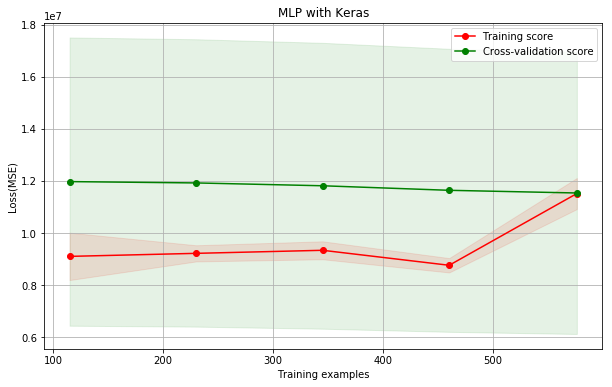

In [22]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import KFold

cv = KFold(n_splits=10, random_state=None, shuffle=True)
estimator = KerasRegressor(build_fn=MLP_model, nb_epoch=10, batch_size=10)

plot_learning_curve(estimator, "MLP with Keras", X_std, y.values, cv=cv, train_sizes=np.linspace(0.2, 1.0, 5))